# Multiple Linear Regression

In this example we will explore multiple linear regression, where we have multiple independent variables ($x$ values) to predict a single dependent variable ($y$ value). Remember, our model looks like this

$$y_i = \beta_0 + x_{i1} \beta_1 + x_{i2} \beta_2 + \cdots + x_{id} \beta_d + \epsilon_i.$$

In matrix/vector math, this is

$$\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix} = 
\begin{pmatrix} 
1 & x_{11} & x_{12} & \cdots & x_{1d}\\
1 & x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \vdots & & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{nd}\\
\end{pmatrix}
\begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \end{pmatrix}
+
\begin{pmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n\end{pmatrix}.$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")

In addition to the above libraries that we've seen before, we are going to import `statsmodels` for doing multiple linear regression.

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We'll take another look at the hippocampus volume from the OASIS dementia data.

In [3]:
df = pd.read_csv("OASIS-hippocampus.csv")
df.head()

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0
1,2,OAS1_0003_MR1,F,R,73,4,3.0,27,0.5,1454,0.708,1.207,NaN,2896,2801,1,1
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0


## Single Linear Regression

Let's start with just a single $x$ variable and see what information `statsmodels` will give us about a simple linear regression. We are going to look at the effect of age on the right hippocampus volume. The `statsmodels` function `ols` (which stands for **o**rdinary **l**east **s**quares) will create a linear regression model from a formula that looks like `"y ~ x"`. The `y` and `x` are column names from your data frame. This sets up a model with an intercept and slope.

In [4]:
reg = smf.ols("RightHippoVol ~ Age", data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          RightHippoVol   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           1.04e-23
Time:                        11:01:56   Log-Likelihood:                -1722.7
No. Observations:                 225   AIC:                             3449.
Df Residuals:                     223   BIC:                             3456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5891.2172    205.031     28.733      0.0

There is a lot of information here! Let's look at a few things going on:

1. The estimated regression parameters, $(\alpha, \beta)$, are in the `coef` column. Note, the coefficient we are most interested in here is the slope $\beta$, which is estimated to be -387 mm$^3$ / year. This says, for each year increase in age, hippocampus volume drops by -387 mm$^3$.
2. The $R^2$ statistic is 0.364, meaning our fitted line explains 36.4% of the variance of right hippocampus volume.
3. The column labeled `P>|t|` is a $p$ value for a hypothesis test of each parameter. This comes from a $t$ test, which we won't cover in detail in this class (but you would if you take a statistics course). The null hypothesis is that the corresponding parameter is zero. In other words, removing this parameter from the model would not make a difference. So, a small $p$ value means we have evidence to reject that null hypothesis, that is, the parameter is having some *statistically significant* effect in the model. Notice both intercept and slope have very small $p$ values (below the reported precision of $10^{-3}$).

As always, let's plot the data and linear regression result:

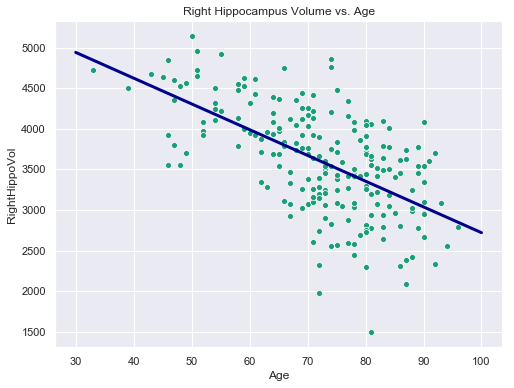

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = "Age", y = "RightHippoVol", data = df)
a = reg.params[0]
b = reg.params[1]
x = np.array([30,100])
sns.lineplot(x, a + b * x, lw = 3, color = 'darkblue')
plt.title("Right Hippocampus Volume vs. Age")
plt.show()

## Binary Independent Variables

What if $x$ is a binary variable instead of continuous? It turns out that this makes perfect sense. In our hippocampus data, let's say we want $x$ to be the binary variable `Dementia` (for healthy = 0, dementia = 1). Remember we can look at the relationship of dementia and hippocampus volume by plotting the densities:

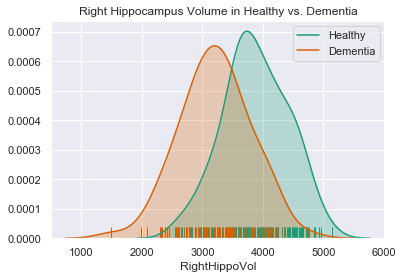

In [6]:
grouped = df.groupby("Dementia")
healthy = grouped.get_group(0)["RightHippoVol"]
dementia = grouped.get_group(1)["RightHippoVol"]

sns.distplot(healthy, hist = False, rug = True, kde_kws = {'shade': True}, label = "Healthy")
sns.distplot(dementia, hist = False, rug = True, kde_kws = {'shade': True}, label = "Dementia")

plt.title("Right Hippocampus Volume in Healthy vs. Dementia")
plt.show()

Now, consider the linear regression equation again:
$$y_i = \alpha + x_i \beta + \epsilon_i.$$
This equation is just modeling the **means** of the two groups of data ($x_i = 0$ and $x_i = 1$). If $x_i = 0$, then $y_i = \alpha$ (plus error). If $x_i = 1$, then $y_i = \alpha + \beta$ (plus error). Assuming that the errors have zero mean, then the $x_i = 0$ (healthy) group has mean $\alpha$, and the $x_i = 1$ (dementia) group has mean $\alpha + \beta$. Let's check this with a linear regression call:

In [7]:
reg = smf.ols("RightHippoVol ~ Dementia", data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          RightHippoVol   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     77.75
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           3.40e-16
Time:                        11:01:57   Log-Likelihood:                -1740.0
No. Observations:                 225   AIC:                             3484.
Df Residuals:                     223   BIC:                             3491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3880.6061     48.303     80.338      0.0

Let's double-check the `coef` column really does give us the means of the two groups:

In [8]:
print(" Mean of healthy =", healthy.mean())
print("           alpha =", reg.params[0])
print("Mean of dementia =", dementia.mean())
print("    alpha + beta =", reg.params[0] + reg.params[1])

 Mean of healthy = 3880.60606061
           alpha = 3880.60606061
Mean of dementia = 3218.12903226
    alpha + beta = 3218.12903226


## Including Multiple Independent Variables

Now let's see how to analyze multiple independent variables in the same model. We are going to take the age and dementia variables that we analyzed separately above and combine them into a single model. We'll use $x_{i1}$ = `Age` and $x_{i2}$ = `Dementia`, giving us the linear regression model:
$$y_i = \beta_0 + x_{i1} \beta_1 + x_{i2} \beta_2 + \epsilon_i$$
First, let's plot all three variables (age, dementia, right hippo volume):

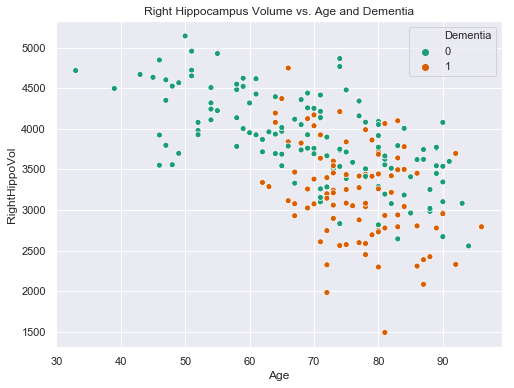

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = "Age", y = "RightHippoVol", hue = "Dementia", data = df)
plt.title("Right Hippocampus Volume vs. Age and Dementia")
plt.show()

One thing to notice here is that the difference in right hippocampus volume between healthy and dementia groups may partially be due to age. This is because the younger subjects (30-60 years) are all healthy, and younger people have larger hippocampi. To see this even more clearly, let's plot the means of the two groups as horizontal lines on the $y$ axis:

In [10]:
a = reg1.params[0]
b = reg1.params[1]
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = "Age", y = "RightHippoVol", hue = "Dementia", data = df)
x = np.array([30,95])
sns.lineplot(x, a, lw = 3, color = sns.color_palette()[0])
sns.lineplot(x, a + b, lw = 3, color = sns.color_palette()[1])
plt.title("Right Hippocampus Volume vs. Age and Dementia")
plt.show()

NameError: name 'reg1' is not defined

This is a case where regression using two independent variables together will give a better analysis.

In [ ]:
reg = smf.ols("RightHippoVol ~ Age + Dementia", data = df).fit()
print(reg.summary())

Notice the following:

1. The difference between the healthy group and the dementia group was -662 mm$^3$ in the previous analysis, but now when we include the age regressor, this difference reduces to -459 mm$^3$.
2. The slope with respect to age has also changed (become less negative).
3. Both the `Age` and `Dementia` variables have low $p$ values, indicating they are having a statistically significant effect in our model.

The $\beta_2$ parameter (the coefficient for the binary variable `Dementia`) is still a constant shift. But now instead of a shift in the mean, it is a shift in the regression intercept. So, a binary regressor is in essence fitting two parallel lines to the data, as we can see in the following plot:

In [ ]:
b0 = reg.params[0]
b1 = reg.params[1]
b2 = reg.params[2]
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = "Age", y = "RightHippoVol", hue = "Dementia", data = df)
x = np.array([30,95])
sns.lineplot(x, b0 + b1 * x, lw = 3, color = sns.color_palette()[0])
sns.lineplot(x, b0 + b2 + b1 * x, lw = 3, color = sns.color_palette()[1])
plt.title("Right Hippocampus Volume vs. Age and Dementia")
plt.show()

## Model Selection

We've seen that including multiple regressors will change the regression results from when we perform single variable regressions. So, how do we know which variables to include in a regression? Maybe include all of them? Maybe include just the ones who have $p$ values below 0.05? This is the question of **model selection**. Let's take a look at a sequence of models, each one adding a new variable to the $x$ data.

Note: 
* **MMSE: Mini-Mental State Exam** is a test of one's memory function (higher test scores means better memory).
* **eTIV: Estimated Total Intracranial Volume** is the total volume inside the skull.

In [ ]:
reg1 = smf.ols("RightHippoVol ~ MMSE", data = df).fit()
reg2 = smf.ols("RightHippoVol ~ MMSE + Age", data = df).fit()
reg3 = smf.ols("RightHippoVol ~ MMSE + Age + Dementia", data = df).fit()
reg4 = smf.ols("RightHippoVol ~ MMSE + Age + Dementia + eTIV", data = df).fit()

In [ ]:
print(reg1.summary())

In [ ]:
print(reg2.summary())

In [ ]:
print(reg3.summary())

In [ ]:
print(reg4.summary())

The thing to note with all of these models is that MMSE starts out statistically significant, but by the time we add `Dementia`, it no longer is. The $p$ value goes up even further when we add `eTIV`. What if we picked the model with the highest $R^2$? This might seem attractive because that would be the model that explains the most variance in $y$. However, $R^2$ *always* increases when you add a new regressor. Notice in the summaries above that the $R^2$ goes up every time we include a new $x$ variable. So, $R^2$ is not a good model selector (it would say to add any $x$ variable you can come up with, no matter how insignificant the effect.)
 
One way to select models is given by the AIC (Akaike Information Criteria), which you can see in the summary tables for each model above. The AIC works on the principle of Occam's Razor, that we should select the simplest model that explains our data. So, it balances how well the model explains the data with a desire to use as few variables as are necessary. The equation for AIC is

$$AIC = 2d - 2 \log(L),$$

where $d$ is the number of $x$ variables we are including, and $\log(L)$ is the log of the likelihood. We want to minimize AIC, which minimizes the number of parameters ($d$) and maximizes the model fit to the data ($\log(L))$. Using the minimal AIC, we would select the 4th model above. Let's try adding one more variable, the education level:

In [ ]:
reg5 = smf.ols("RightHippoVol ~ MMSE + Age + Dementia + eTIV + Educ", data = df).fit()
print(reg5.summary())

Notice that the AIC went up when we added education. So, this would suggest we should probably not include it in our model.

Finally, we should note that we've only looked at a fraction of the possible models here. If we have $K$ potential $x$ variables to choose from, then we have a possibility of $2^K$ combinations of any subset of these variables. That can be a lot of models to look at! So, the AIC only works if you have a small $K$, or have another way to limit the combinatorial explosion in the number of potential models. The best selection of $x$ variables according to AIC (at least that I was able to find) is the following (**nWBV: normalized Whole-Brain Volume** is the total volume of the brain as a fraction of eTIV): 

In [ ]:
reg = smf.ols("RightHippoVol ~ Age + Dementia + eTIV + nWBV", data = df).fit()
print(reg.summary())